In [14]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random

In [15]:
# Load the dataset
dataset = pd.read_csv(r'../data/input/raw/240624_validation_data.csv')

# Extract the time, forecasted demand and actual demand
time = dataset['time']
time = pd.to_datetime(time, utc=True)
forecast_demand = dataset['predicted heat']
actual_demand = dataset['delivered heat']

# Create a dataframe
df_data = pd.DataFrame({'time' : time, 'actual_demand': actual_demand, 'forecast_demand': forecast_demand})
df_data['hour']=time.dt.hour

# Calculate the error and absolute error
df_data['error']= df_data['actual_demand'] - df_data['forecast_demand']

# Calculate the mean of the error for whole dataset
mu_all = df_data['error'].mean()
sigma_all = df_data['error'].std()
print('Mean of the mean of the error of each hour:', mu_all)
print('Standard deviation of the mean of the error of each hour:', sigma_all)

Mean of the mean of the error of each hour: -8.39020298257356
Standard deviation of the mean of the error of each hour: 31.42172005784749


In [16]:
# Select the date for which you want to extract the data
selected_date = '2023-04-01'

# Number of scenarios
num_scenarios = 10

# Extract the data for the selected date
daily_date = df_data[df_data['time'].dt.date == pd.to_datetime(selected_date).date()].reset_index(drop=True)
daily_date = daily_date[['time', 'hour', 'actual_demand', 'forecast_demand', 'error']]
if(len(daily_date)==24):
    print('The selected date has 24 hours')
else:
    print('The selected date does not have 24 hours')

daily_date

The selected date has 24 hours


,time,hour,actual_demand,forecast_demand,error
0,2023-04-01 00:00:00+00:00,0,45.141668,79.256436,-34.114768
1,2023-04-01 01:00:00+00:00,1,71.408335,88.850384,-17.442050
2,2023-04-01 02:00:00+00:00,2,234.970838,166.624694,68.346144
3,2023-04-01 03:00:00+00:00,3,146.212502,113.137177,33.075326
4,2023-04-01 04:00:00+00:00,4,131.770836,118.939521,12.831315
5,2023-04-01 05:00:00+00:00,5,129.470836,124.614834,4.856001
6,2023-04-01 06:00:00+00:00,6,160.633337,125.941581,34.691755
7,2023-04-01 07:00:00+00:00,7,168.050002,118.988194,49.061808
8,2023-04-01 08:00:00+00:00,8,162.475003,113.102637,49.372366
9,2023-04-01 09:00:00+00:00,9,96.350001,103.574392,-7.224391


In [17]:
# Create a dataframe for heat_demand
heat_demand = daily_date
t = [str(i) for i in range(1,25)]
heat_demand = heat_demand.drop(columns=['time','actual_demand', 'error', 'hour'])
heat_demand['t'] = t

# Reorder the columns
heat_demand = heat_demand[['t', 'forecast_demand']]
heat_demand


,t,forecast_demand
0,1,79.256436
1,2,88.850384
2,3,166.624694
3,4,113.137177
4,5,118.939521
5,6,124.614834
6,7,125.941581
7,8,118.988194
8,9,113.102637
9,10,103.574392


---

## First Methode

In [18]:
# Calculate the mean and standard deviation of the error of each hour
error = df_data.groupby('hour')['error'].agg(['mean', 'std']).reset_index()
error  = error.rename(columns={'mean': 'mu', 'std': 'sigma'})
error

,hour,mu,sigma
0,0,-12.731658,25.018753
1,1,-8.717702,25.787823
2,2,38.628091,40.062211
3,3,-11.219356,35.896108
4,4,4.661963,29.891503
5,5,-3.150345,30.625035
6,6,-11.665525,28.687483
7,7,-8.965185,30.891632
8,8,-4.254730,29.094431
9,9,-9.849401,33.982801


In [19]:
# Generate scenarios for the selected date
forecast_demand = daily_date['forecast_demand']

scenarios = np.zeros((num_scenarios, 24))


for i in range(24):
    mu = error.loc[error['hour'] == i, 'mu'].values[0]
    sigma = error.loc[error['hour'] == i, 'sigma'].values[0]
    print('Hour:', i, 'Mean:', mu, 'Standard deviation:', sigma)
    hourly_scenarios = np.random.normal(mu, sigma, num_scenarios)
    print('Hourly scenarios:', hourly_scenarios)
    scenarios[:, i] = forecast_demand[i] + hourly_scenarios

scenarios_df = pd.DataFrame(scenarios)


# Calculate the probability for each scenario
probabilities = stats.norm(mu_all, sigma_all).pdf(scenarios - forecast_demand.values.reshape(1, -1))
probabilities = probabilities.prod(axis=1)

# Add the probabilities to the scenarios dataframe
scenarios_df['probability'] = probabilities
scenarios_df


Hour: 0 Mean: -12.731658021190215 Standard deviation: 25.018753157221795
Hourly scenarios: [ 20.23890423 -41.40137021 -33.78593083 -35.30099876 -15.84544314
  -3.11293927 -12.33663265 -16.20846439  20.32053421 -28.64364143]
Hour: 1 Mean: -8.717701939869812 Standard deviation: 25.787822594592562
Hourly scenarios: [-30.50908147  24.61368173  -4.58128653  -5.48812063 -13.25911252
 -25.34657234 -25.77797639   8.97677402  29.55310465  -1.34696852]
Hour: 2 Mean: 38.62809145641247 Standard deviation: 40.06221098717317
Hourly scenarios: [ 28.60604312  38.54358353  60.25753391  46.61064723 -54.35307399
  98.8840909  112.79839822  36.90532944   0.53879352   1.13092917]
Hour: 3 Mean: -11.219355528775246 Standard deviation: 35.89610812413864
Hourly scenarios: [-64.62422938 -27.96370774 -44.78640086 -65.17579818  16.54004619
 -36.31619597  34.21672665 -28.85230743  -1.71104043  27.264904  ]
Hour: 4 Mean: 4.6619634940865975 Standard deviation: 29.89150310430875
Hourly scenarios: [-49.88772939  27.19

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,probability
0,99.495340,58.341303,195.230737,48.512947,69.051792,110.738088,113.357921,137.717602,90.548060,117.898628,...,116.090206,119.627849,145.844960,113.993561,77.953629,57.048202,58.356375,41.767437,100.462111,9.913708e-50
1,37.855066,113.464066,205.168278,85.173469,146.133855,110.910684,109.367611,97.635876,112.725790,133.677344,...,86.384196,61.460024,142.101725,132.864018,81.540541,-0.843574,91.865361,48.693536,84.299087,9.494604e-51
2,45.470505,84.269098,226.882228,68.350776,131.174065,130.364631,165.163914,110.629219,102.720193,70.026828,...,52.396501,104.961695,64.136173,57.380851,89.789979,59.019889,64.305554,12.196341,54.532735,2.527818e-51
3,43.955437,83.362264,213.235341,47.961379,138.348680,133.618782,139.866171,92.918713,113.540713,107.685260,...,144.454910,58.901215,38.878515,96.893921,83.190498,54.085012,62.752615,53.521104,70.688182,1.946555e-51
4,63.410993,75.591272,112.271620,129.677223,131.155958,137.852657,102.817475,108.250761,104.372210,54.959144,...,111.933613,65.674086,90.636971,137.553799,127.056416,101.838732,51.873228,63.633776,79.813455,2.170339e-49
5,76.143497,63.503812,265.508785,76.820981,119.694912,110.401509,85.995488,133.110632,75.962643,146.134978,...,89.195735,67.457573,86.937416,169.621071,39.288048,31.074691,45.742134,52.434585,76.942815,2.448091e-54
6,66.919803,63.072408,279.423092,147.353903,147.044651,125.487367,113.940365,163.082207,139.430647,119.544944,...,59.184447,136.961796,105.329501,150.173446,82.964412,60.987862,64.468936,64.965157,44.664353,8.239014e-54
7,63.047971,97.827158,203.530024,84.284869,124.687938,76.826786,87.518482,180.290565,91.694701,66.866242,...,195.957581,165.084867,119.625971,114.625282,134.131062,13.641486,52.098301,85.957294,78.370957,1.770804e-54
8,99.576970,118.403489,167.163488,111.426136,80.999631,85.433168,165.272863,89.222885,127.068584,117.916376,...,104.076150,87.540593,98.226824,102.034187,76.518291,52.817157,30.732557,99.975070,77.112544,3.232565e-49
9,50.612794,87.503416,167.755623,140.402081,150.840235,126.145420,100.052603,118.110899,106.195651,130.077834,...,167.783536,114.679195,122.639069,69.464580,110.203344,53.030072,52.575040,52.128293,66.276436,7.302089e-50


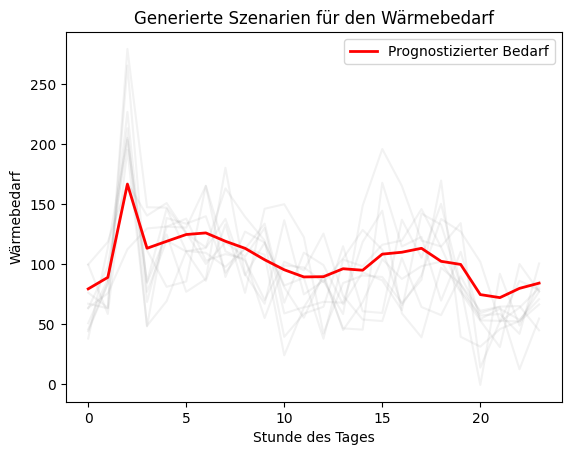

In [20]:
plt.plot(scenarios.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

---

## Second Methode: Monte Carlo Sampling and Roulette Wheel Mechanism


In [21]:
# number of intervals
num_intervals = 7  
intervals = np.linspace(mu_all - 3*sigma_all, mu_all + 3*sigma_all, 8)
interval_centers = (intervals[:-1] + intervals[1:]) / 2  
print('Intervals:',intervals)
print('Interval Centers:',interval_centers)

# calculate the probabilities
probabilities = [stats.norm.cdf(intervals[i+1], mu_all, sigma_all) - stats.norm.cdf(intervals[i], mu_all, sigma_all) for i in range(len(intervals)-1)]
cum_probabilities = np.cumsum(probabilities)

# print the probabilities
print('Probabilities:',probabilities)
print('Edge on Scale 0.XX-0.99X Probabilities:',cum_probabilities)

# Function to randomly select an interval based on the CDF

def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


Intervals: [-102.65536316  -75.72246025  -48.78955734  -21.85665444    5.07624847
   32.00915138   58.94205428   85.87495719]
Interval Centers: [-89.1889117  -62.2560088  -35.32310589  -8.39020298  18.54269992
  45.47560283  72.40850574]
Probabilities: [0.014712387572198223, 0.08320911123950271, 0.2348461740542938, 0.33176485820475055, 0.23484617405429364, 0.0832091112395027, 0.014712387572198171]
Edge on Scale 0.XX-0.99X Probabilities: [0.01471239 0.0979215  0.33276767 0.66453253 0.89937871 0.98258782
 0.9973002 ]


In [22]:
# Generate scenarios
T = 24  # Number of time steps
scenarios = []

for _ in range(num_scenarios):
    scenario = []
    for t in range(T):
        interval_index = select_interval(cum_probabilities)
        scenario.append(interval_centers[interval_index])
    scenarios.append(scenario)

    
# Calculate normed probability for each scenario
scenario_probabilities = np.prod([[probabilities[select_interval(cum_probabilities)] for _ in range(T)] for _ in range(num_scenarios)], axis=1)
normalized_probabilities = scenario_probabilities / scenario_probabilities.sum()

# Convert scenarios to DataFrame for better visualization
scenarios_mu_df = pd.DataFrame(scenarios, columns=[f'Time_{t}' for t in range(T)])
probabilities_df = pd.DataFrame(normalized_probabilities, columns=['Probability'])


In [23]:
probabilities_df


,Probability
0,0.014771
1,0.014787
2,0.000082
3,0.002598
4,0.468114
5,0.468623
6,0.000463
7,0.000164
8,0.000919
9,0.029478


In [24]:
# Add the predicted thermal demand to the error scenarios to get the actual thermal demand scenarios
scenarios_df = scenarios_mu_df.apply(lambda row: daily_date['forecast_demand'] + row.values, axis=1)

# Create csv file for the scenarios
scenarios_df.to_csv('../data/output/preprocessing/scenarios.csv', index=False)

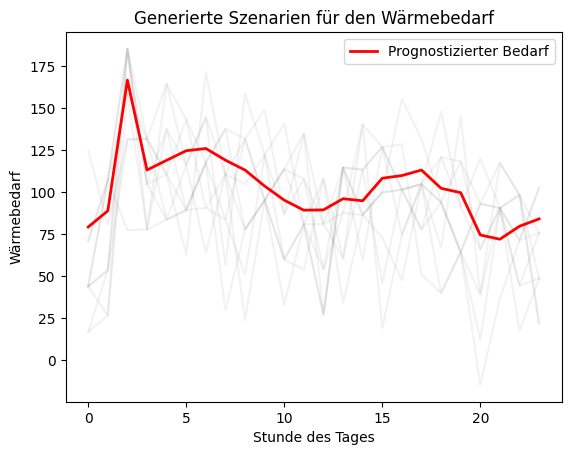

In [25]:
plt.plot(scenarios_df.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

## Szenarien Reduktion

In [26]:
# Importing the libraries

from sklearn.cluster import KMeans
from scipy.stats import entropy

### Backward Scenario Reduction Methode
Ergänzen.

### Improved k-means Clustering

Ergänzen.